# 1. 앙상블 학습

- 앙상블 학습(ensemble learning)을 통한 분류는 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말함
- 앙상블 알고리즘의 대표격인 랜덤 포레스트와 그래디언트 부스팅 알고리즘은 뛰어난 성능과 쉬운 사용, 다양한 활용도로 많이 애용됨
- XGBoost, XGBoost와 유사한 예측 성능을 가지면서도 훨씬 빠른 수행 속도를 가진 LightGBM, 여러 가지 모델의 결과를 기반으로 메타 모델을 수립하는 스태킹(Stacking) 등의 앙상블 알고리즘이 많이 쓰임
- 앙상블 학습의 유형은 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)의 3가지로 나눌 수 있으며, 이외에도 스태킹을 포함한 다양한 앙상블 방법이 있음
- 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식. 보팅과 배깅의 다른 점은 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것
- 대표적인 배깅 방식 = 랜덤 포레스트
- 배깅 방식에서 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데, 이렇게 개별 Classifier에게 데이터를  샘플링해서 추출하는 방식을 부트스트래핑(Bootstrapping) 분할 방식이라고 함
- 배깅 방식은 데이터 세트 간에 중첩을 허용함
- 부스팅: 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행함. 예측 성능이 뛰어남
- 대표적인 부스팅 모듈 = 그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)
- 스태킹: 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어서 다른 모델로 재학습시켜 결과를 예측하는 방법

## 보팅 유형: 하드 보팅(Hard Voting) vs 소프트 보팅(Soft Voting)

- 하드 보팅: 예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정
- 소프트 보팅: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정
- 일반적으로 소프트 보팅이 보팅 방법으로 적용됨. 소프트 보팅이 예측 성능이 더 좋음

### 보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트 예측

- 위스콘신 유방암 데이터 세트: 유방암의 악성 종양, 양성 종양 여부를 결정하는 이진 분류 데이터 세트이며 종ㅇ양의 크기, 모양 등의 형태와 관련한 많은 피처를 가지고 있음

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# 로지스틱 회귀, KNN을 기반으로 하여 소프트 보팅 방식으로 보팅 분류기 생성

# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression(solver = 'liblinear')
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
## estimators = 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력받음
## voting = hard(디폴트). 하드 보팅 / soft. 소프트 보팅
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


- 보팅 분류기의 정확도가 조금 더 높음

# 2. 랜덤 포레스트

- 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며, 다양한 영역에서 높은 예측 성능을 보임
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됨

In [3]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0] + '_' + str(x[1])
                                                                                              if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

In [4]:
import pandas as pd

def get_human_dataset():
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep = '\s+', header = None, names = ['column_index', 'column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 dataframe 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # dataframe에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터를 dataframe으로 로딩. 칼럼명은 feature_name 적용
    x_train = pd.read_csv('./human_activity/train/X_train.txt', sep = '\s+', names = feature_name)
    x_test = pd.read_csv('./human_activity/test/X_test.txt', sep = '\s+', names = feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 dataframe으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep = '\s+', header = None, names = ['action'])
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = get_human_dataset()

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

x_train, x_test, y_train, y_test = get_human_dataset()

# 랜덤포레스트 학습 및 예측 성능 평가
rf_clf = RandomForestClassifier(random_state = 0, max_depth = 8)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9196


## 랜덤 포레스트 하이퍼 파라미터 튜닝

- n_estimators: 랜덤 포레스트에서 결정 트리의 개수를 지정. 디폴트 = 10개.
- max_features: 디폴트 = auto. 따라서 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt(전체 피처 개수)만큼 참조함
- 그밖에 max_depth, min_samples_leaf, min_samples_split와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있음

In [7]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [8, 16, 24],
          'min_samples_leaf': [1, 6, 12],
          'min_samples_split': [2, 8, 16]}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


In [8]:
# 추출된 최적 하이퍼 파라미터로 재학습 후 테스트 데이터에서 예측 성능 측정

rf_clf1 = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 6, max_depth = 16, min_samples_split = 2, random_state = 0)
rf_clf1.fit(x_train, y_train)
pred = rf_clf1.predict(x_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9260


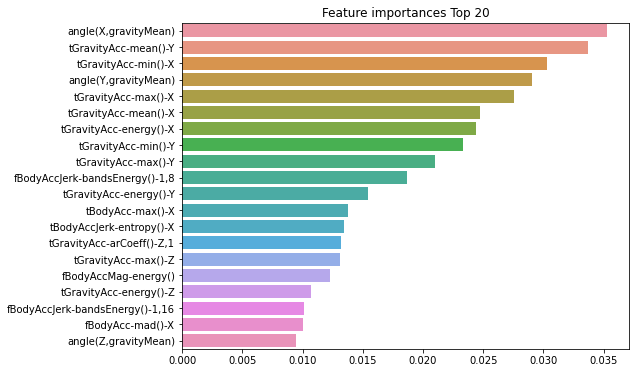

In [9]:
# 피처 중요도

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

# 3. GBM(Gradient Boosting Machine)

- 부스팅 알고리즘: 여러 개의 약한 학습기를 순차적으로 학습 - 예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 부스팅의 대표적인 구현: AdaBoost(Adaptive boosting), 그래디언트 부스트
- 에이다 부스트(AdaBoost): 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
- GBM도 에이다부스트와 유사하나 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것이 큰 차이
- 경사 하강법: 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
import time

x_train, x_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행시간: {0:.1f}초'.format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행시간: 2047.6초


- 일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 뛰어난 경우가 많음
- 그러나 수행 시간이 오래 걸림

## GBM 하이퍼 파라미터

- n_estimators, max_depth, max_features와 같은 트리 기반 자체의 파라미터와
- loss: 경사 하강법에서 사용할 비용 함수 지정. 특별한 이유가 없으면 기본값인 deviance를 그대로 적용함
- learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률. weak learner가 순차적으로 오류 값을 보정해 나가는데 적용하는 계수. 0 ~ 1사이의 값을 지정할 수 있으며 기본값은 0.1. learning_rate는 n_eatimators와 상호 보완적으로 조합해 사용함.
- n_estimators: weak learner의 개수. 디폴트 = 100
- subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율. 디폴트 = 1. 이는 전체 학습 데이터를 기반으로 학습한다는 의미. 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정함

- GBM은 괒거합에도 강한 뛰어난 예측 성능을 가진 알고리즘
- 하지만 수행 시간이 오래 걸린다는 단점이 있음
- GBM을 기반으로 새롭게 만들어진 알고리즘 중 머신러닝에서 많이 이용되는 그래디언트 부스팅 기반 머신러닝 패키지는 XGBoost와 LightGBM